In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [34]:
img =image.load_img("Dataset Criminal/Train/Osama/Osama39.png")

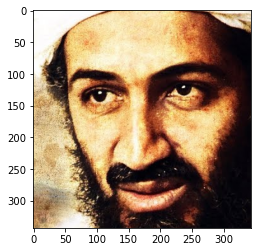

In [35]:
plt.imshow(img)

In [5]:
cv2.imread("Dataset Criminal/Train/Osama/Osama39.png")

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [217, 235, 242],
        [212, 230, 237],
        [210, 228, 235]],

       [[253, 253, 253],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [214, 226, 232],
        [209, 219, 226],
        [208, 218, 225]],

       [[253, 253, 253],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [213, 222, 231],
        [211, 218, 227],
        [210, 218, 225]],

       ...,

       [[ 86, 140, 181],
        [ 91, 143, 184],
        [105, 156, 196],
        ...,
        [ 10,   3,   6],
        [ 10,   3,   6],
        [ 10,   3,   6]],

       [[ 96, 150, 191],
        [ 84, 136, 177],
        [ 88, 139, 179],
        ...,
        [ 10,   3,   6],
        [ 10,   3,   6],
        [ 10,   3,   6]],

       [[100, 154, 195],
        [ 98, 150, 191],
        [104, 155, 195],
        ...,
        [  9,   4,   6],
        [ 10,   3,   6],
        [  9,   4,   6]]

In [36]:
cv2.imread("Dataset Criminal/Train/Osama/Osama39.png").shape

(343, 343, 3)

In [37]:
img1 =image.load_img("Dataset Criminal/Train/Pablo/Pablo8.png")

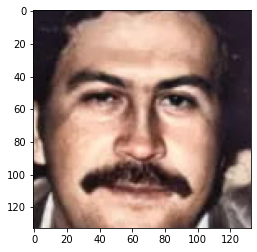

In [38]:
plt.imshow(img1)

In [39]:
cv2.imread("Dataset Criminal/Train/Pablo/Pablo8.png").shape

(133, 133, 3)

In [40]:
train=ImageDataGenerator(rescale=1/254)
validation=ImageDataGenerator(rescale=1/254)

In [43]:
train_dataset=train.flow_from_directory('Dataset Criminal/Train/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary'
                                        )
validation_dataset=train.flow_from_directory('Dataset Criminal/validate/',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary'
                                        )

Found 78 images belonging to 2 classes.
Found 9 images belonging to 2 classes.


In [44]:
train_dataset.class_indices

{'Osama': 0, 'Pablo': 1}

In [10]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
train_dataset[0]

(array([[[[0.94094485, 0.9488189 , 0.8976378 ],
          [0.96062994, 0.96850395, 0.9251968 ],
          [0.9448819 , 0.93307084, 0.9133858 ],
          ...,
          [0.496063  , 0.5       , 0.42913386],
          [0.54330707, 0.53937006, 0.46850392],
          [0.53149605, 0.51968503, 0.4527559 ]],
 
         [[0.87795275, 0.88188976, 0.8188976 ],
          [0.9212598 , 0.9251968 , 0.87007874],
          [0.8937008 , 0.88188976, 0.8543307 ],
          ...,
          [0.6456693 , 0.6496063 , 0.5866142 ],
          [0.6732283 , 0.6653543 , 0.6062992 ],
          [0.6574803 , 0.6456693 , 0.5866142 ]],
 
         [[0.9094488 , 0.9015748 , 0.8425197 ],
          [0.8897638 , 0.88188976, 0.8228347 ],
          [0.8897638 , 0.87795275, 0.8425197 ],
          ...,
          [0.5629921 , 0.5669291 , 0.511811  ],
          [0.63779527, 0.62992126, 0.5787402 ],
          [0.6456693 , 0.62992126, 0.5826772 ]],
 
         ...,
 
         [[0.9251968 , 0.8031496 , 0.5787402 ],
          [0.93700

In [11]:
model=tf.keras.models.Sequential([ tf.keras. layers.Conv2D(16, (3,3),activation='relu',input_shape=(200,200,3)),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers. Conv2D(32, (3,3), activation = 'relu'),
                                  tf.keras.layers. MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                  tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512, activation= 'relu'),
                                  ##
                                  tf.keras.layers.Dense(1, activation="sigmoid")
                                  ])

In [12]:
model.compile(loss= 'binary_crossentropy', 
              optimizer = RMSprop(lr=0.001), 
              metrics =['accuracy'])

C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
history=model.fit(train_dataset,
         steps_per_epoch=3,
         epochs=10,
         validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 2s 288ms/step - loss: 5.1970 - accuracy: 0.6667 - val_loss: 2.2044 - val_accuracy: 0.5556
Epoch 2/10
3/3 [==============================] - 1s 211ms/step - loss: 2.5705 - accuracy: 0.5556 - val_loss: 0.6801 - val_accuracy: 0.7778
Epoch 3/10
3/3 [==============================] - 1s 218ms/step - loss: 1.3982 - accuracy: 0.7778 - val_loss: 0.6386 - val_accuracy: 0.8889
Epoch 4/10
3/3 [==============================] - 1s 210ms/step - loss: 0.5674 - accuracy: 0.7778 - val_loss: 0.4804 - val_accuracy: 0.7778
Epoch 5/10
3/3 [==============================] - 1s 210ms/step - loss: 0.3679 - accuracy: 0.8889 - val_loss: 0.4731 - val_accuracy: 0.7778
Epoch 6/10
3/3 [==============================] - 1s 289ms/step - loss: 0.9391 - accuracy: 0.4444 - val_loss: 0.5963 - val_accuracy: 0.7778
Epoch 7/10
3/3 [==============================] - 1s 227ms/step - loss: 0.2572 - accuracy: 1.0000 - val_loss: 1.2104 - val_accuracy: 0.5556
Epoch 8/10
3/3 [====

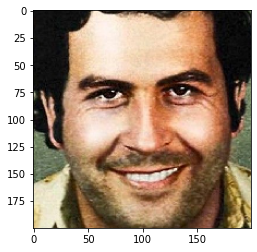

In [14]:
img2=image.load_img('Dataset Criminal/Test/Pablo/Pablo2.png',target_size=(200,200))
plt.imshow(img2)

In [15]:
X=image.img_to_array(img2)
X=np.expand_dims(X,axis=0)
images=np.vstack([X])
val=model.predict(images)
if val==0:
    print("Osama")
else:
    print("Pablo")

1/1 [==============================] - 0s 96ms/step
Pablo


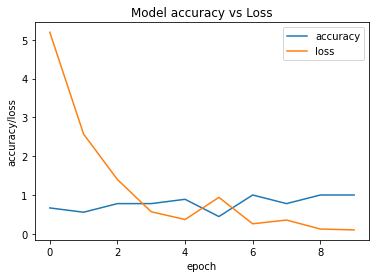

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title("Model accuracy vs Loss")
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'],loc='best')
plt.show()

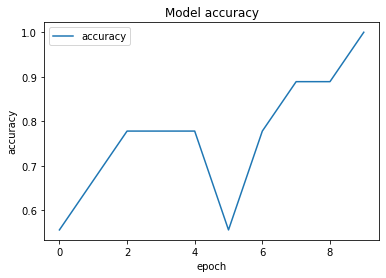

In [23]:
plt.plot(history.history['accuracy'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'],loc='best')
plt.show()

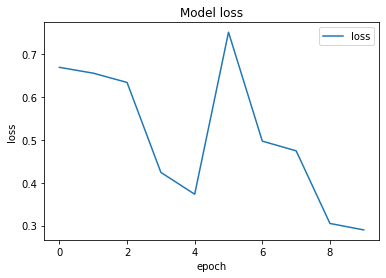

In [24]:
plt.plot(history.history['loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'],loc='best')
plt.show()

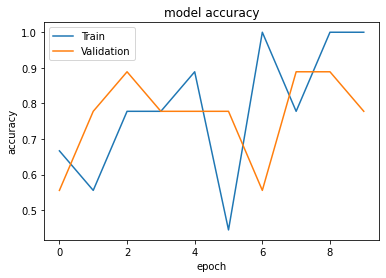

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

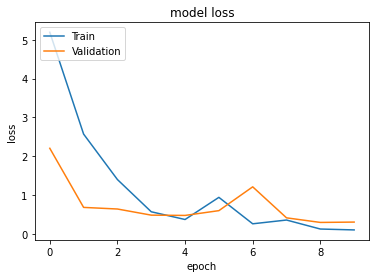

In [18]:
plt.plot (history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend (['Train', 'Validation'], loc='upper left') 
plt.show()